In [233]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as ols

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv(r'C:\Users\yurong.mao\Desktop\python\weekly_session_gausers.csv', parse_dates=['weekstart'], index_col='weekstart')
df

,week,sessions,ga_users
weekstart,,,
2019-01-01,2019-01,727481,652188
2019-01-07,2019-02,931254,837319
2019-01-14,2019-03,913018,821837
2019-01-21,2019-04,993692,894350
2019-01-28,2019-05,973372,877774
...,...,...,...
2020-11-30,2020-49,4769887,4274448
2020-12-07,2020-50,3940520,3547453
2020-12-14,2020-51,3272698,2944410


In [234]:
#drop week and ga_users
df=df.drop("week",axis=1)
df=df.drop("ga_users",axis=1)

In [229]:
#convert week start to datetime
df.index = pd.to_datetime(df.index)

In [230]:
#set frequency of week start for seasonality decompose
df.asfreq('W-MON')

,sessions
weekstart,
2019-01-07,931254
2019-01-14,913018
2019-01-21,993692
2019-01-28,973372
2019-02-04,1018365
...,...
2020-11-30,4769887
2020-12-07,3940520
2020-12-14,3272698


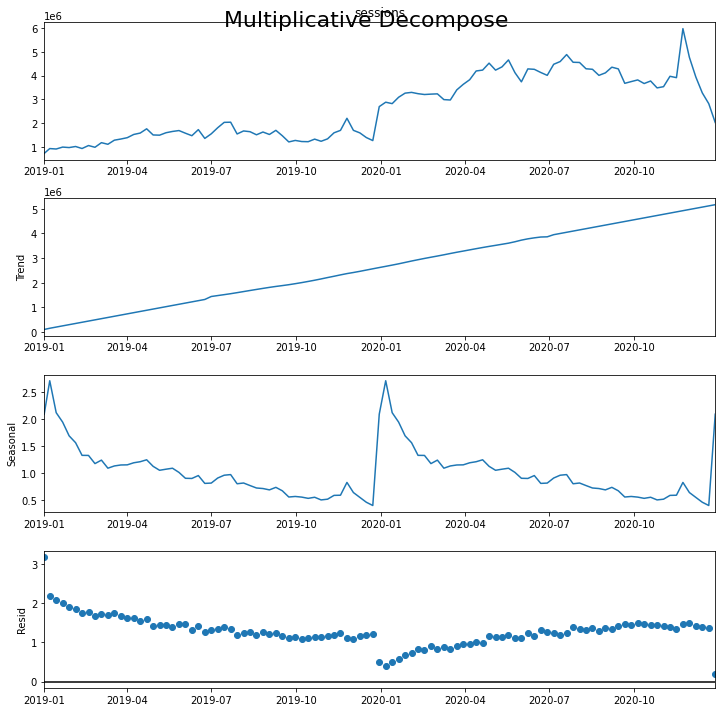

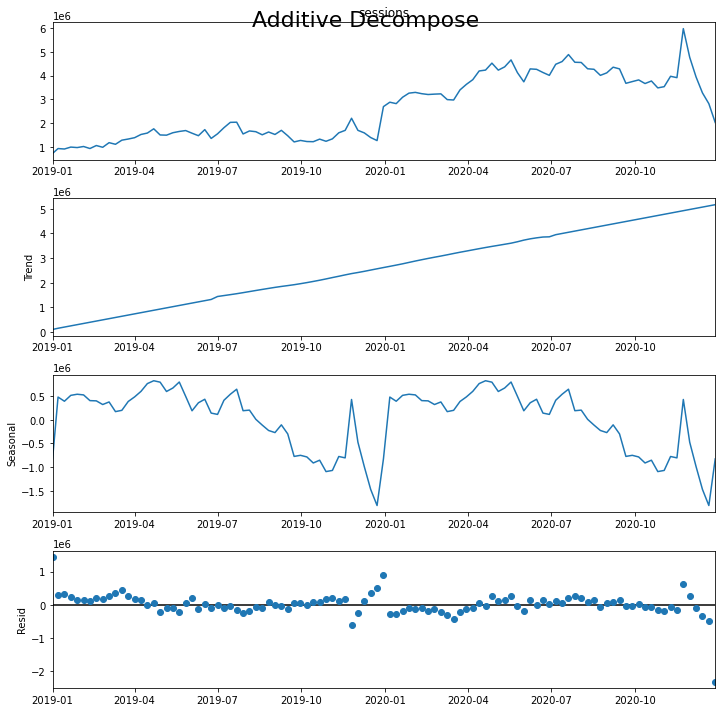

In [203]:
#First method is to set period. Can test with other period numbers.

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['sessions'], model='multiplicative', extrapolate_trend='freq', period=52)

# Additive Decomposition
result_add = seasonal_decompose(df['sessions'], model='additive', extrapolate_trend='freq', period=52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [239]:
# Extract the Components ----multiplicative method
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
weekstart,,,,
2019-01-01,2.095620,109188.082223,3.179317,727481.0
2019-01-07,2.714149,157821.924594,2.174038,931254.0
2019-01-14,2.123046,206455.766965,2.083017,913018.0
2019-01-21,1.948361,255089.609335,1.999354,993692.0
2019-01-28,1.694885,303723.451706,1.890864,973372.0


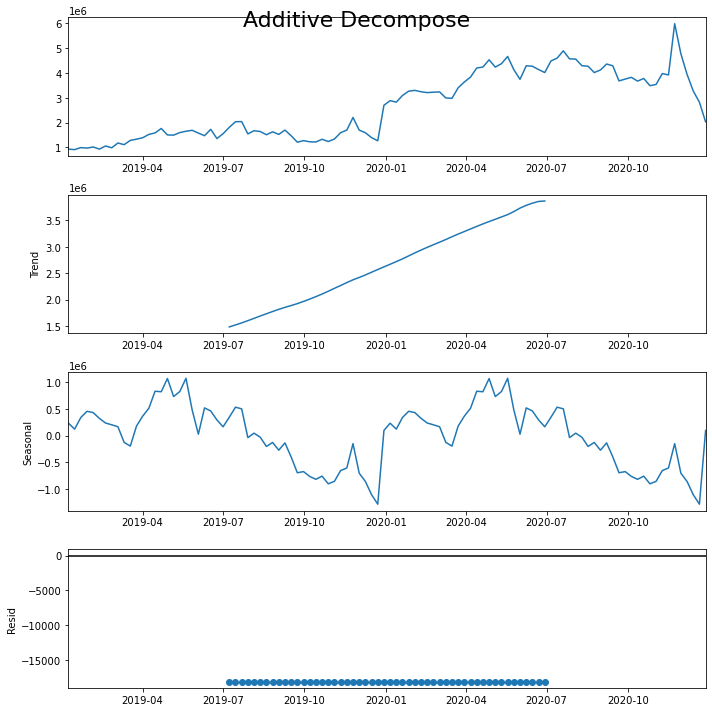

In [214]:
#Second method is using the existing frequency setting. 

decomp=sm.tsa.seasonal_decompose(df.asfreq('W-MON'), model = 'additive')
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

fig=decomp.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()



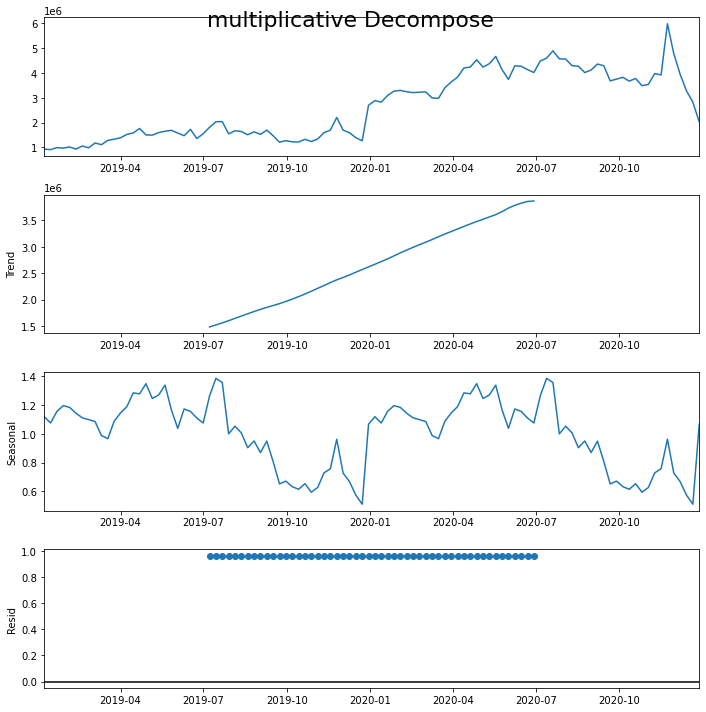

In [227]:
decomp=sm.tsa.seasonal_decompose(df.asfreq('W-MON'), model = 'multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

fig=decomp.plot().suptitle('multiplicative Decompose', fontsize=22)
plt.show()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

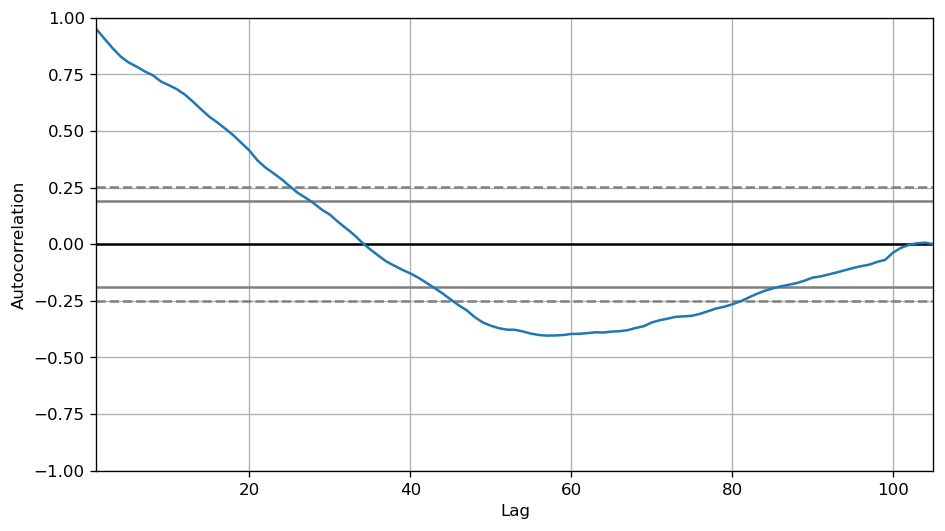

In [236]:
#autocorrelation plot for sessions

from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.sessions.tolist())

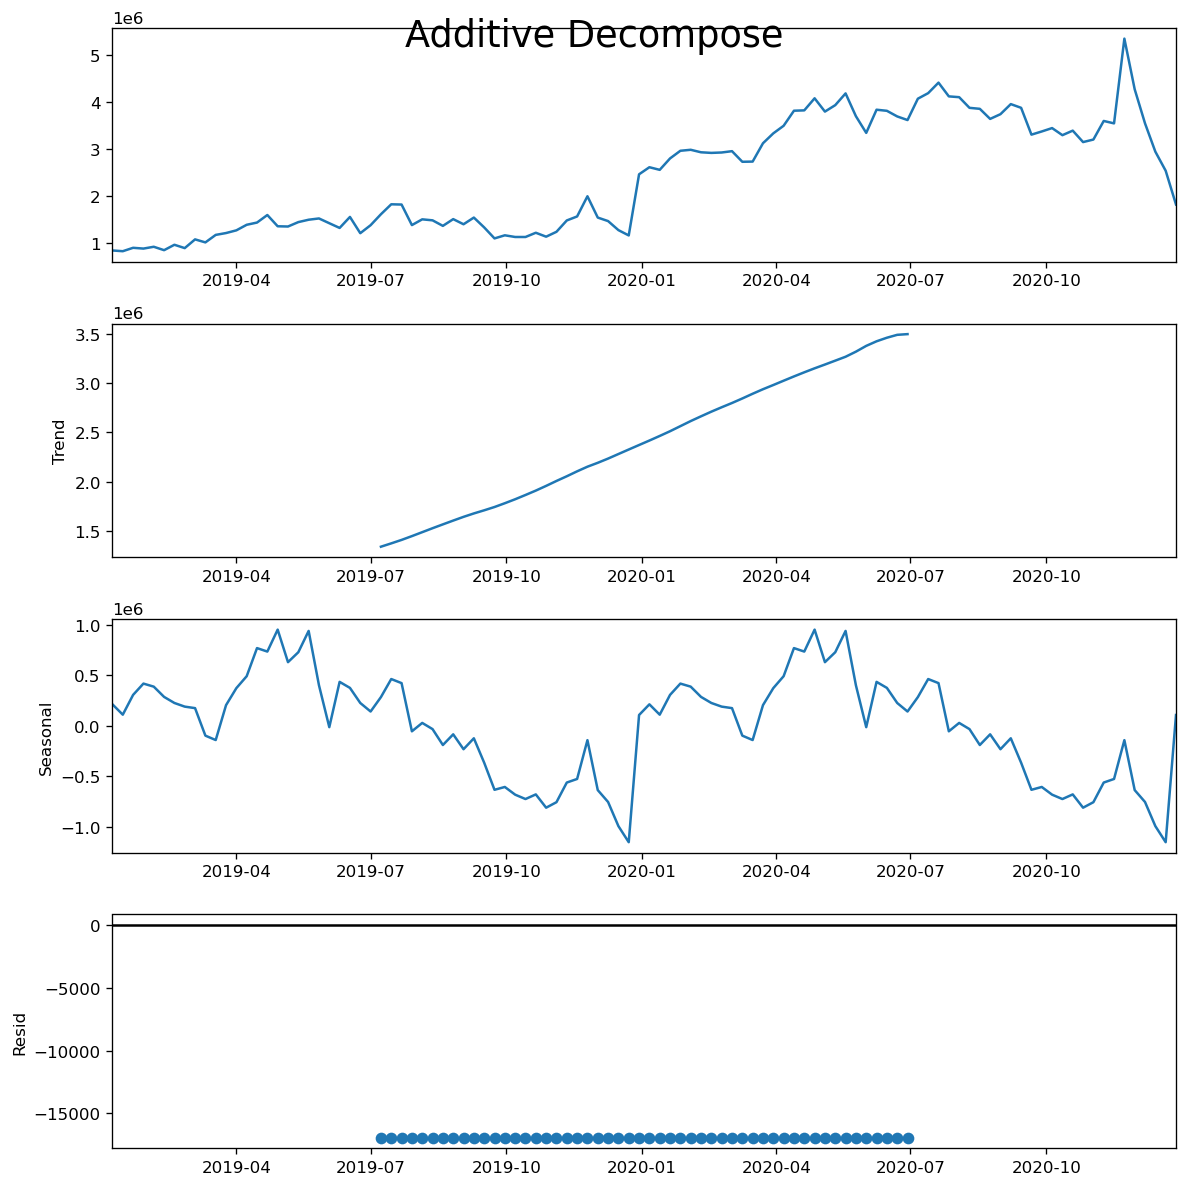

In [242]:
#decompose seasonality on ga users
# Import Data
df = pd.read_csv(r'C:\Users\yurong.mao\Desktop\python\weekly_session_gausers.csv', parse_dates=['weekstart'], index_col='weekstart')

#drop week and ga_users
df=df.drop("week",axis=1)
df=df.drop("sessions",axis=1)
#convert week start to datetime
df.index = pd.to_datetime(df.index)
#set frequency of week start for seasonality decompose
df.asfreq('W-MON')



decomp=sm.tsa.seasonal_decompose(df.asfreq('W-MON'), model = 'additive')
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

fig=decomp.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

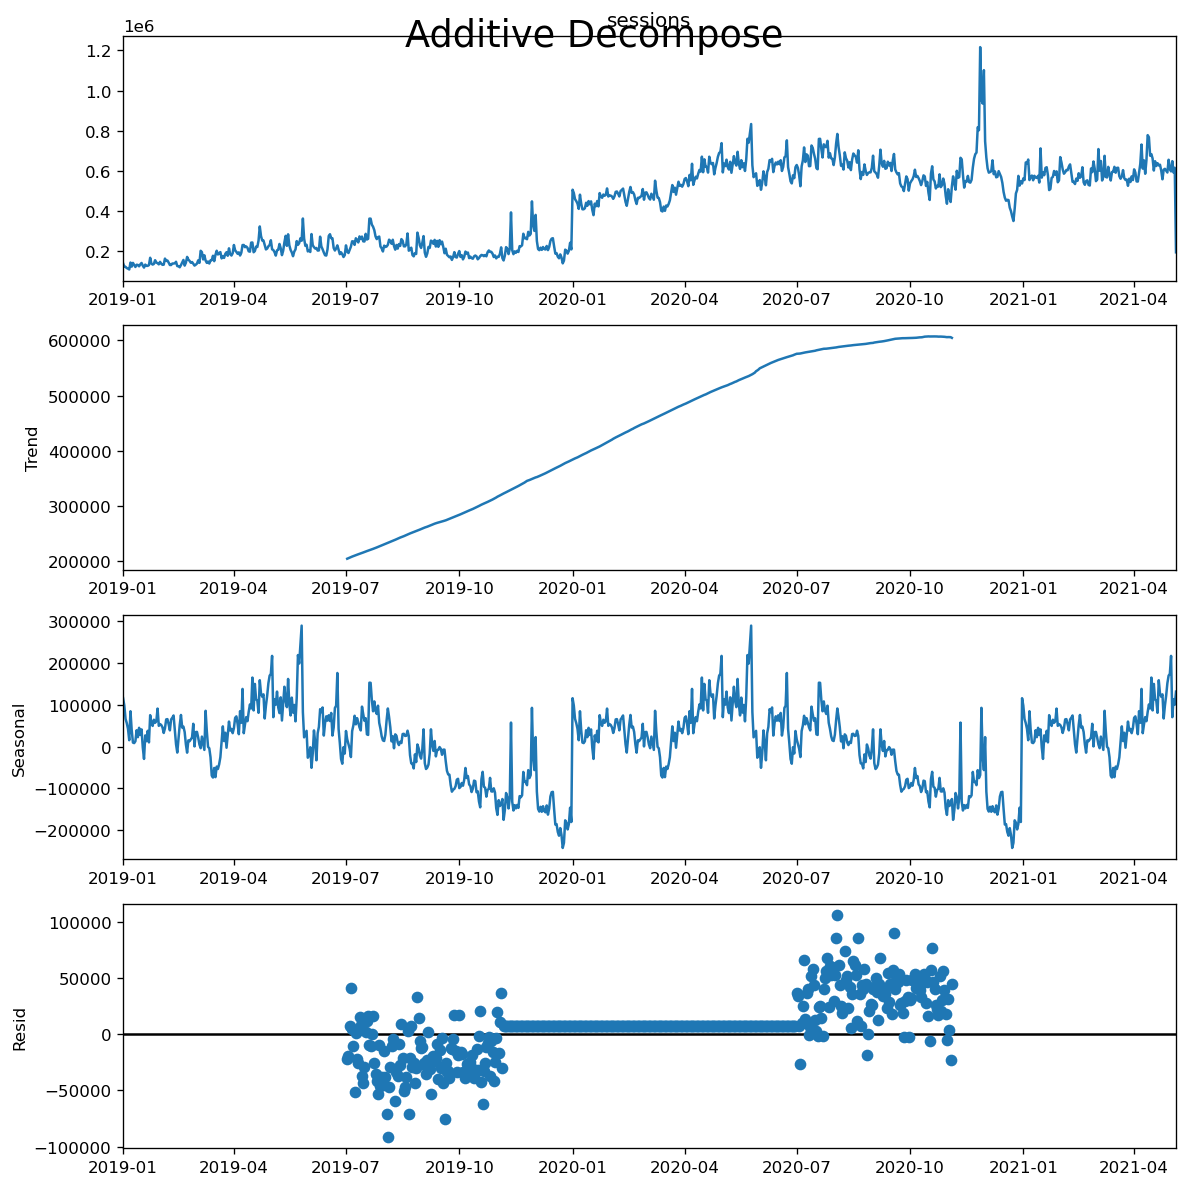

In [255]:
###Test out daily values seasonality
# Import Data
df = pd.read_csv(r'C:\Users\yurong.mao\Desktop\python\daily_data.csv', parse_dates=['datetime'], index_col='datetime')

#drop week and ga_users
#df=df.drop("week",axis=1)
#df=df.drop("sessions",axis=1)
#convert week start to datetime
df.index = pd.to_datetime(df.index)
#set frequency of week start for seasonality decompose
#df.asfreq('W-MON')

#decompose seasonality on ga users on daily

#decomp=sm.tsa.seasonal_decompose(df.asfreq('W-MON'), model = 'additive')

decomp=sm.tsa.seasonal_decompose(df['sessions'], model = 'additive', period=365)
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})

fig=decomp.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()